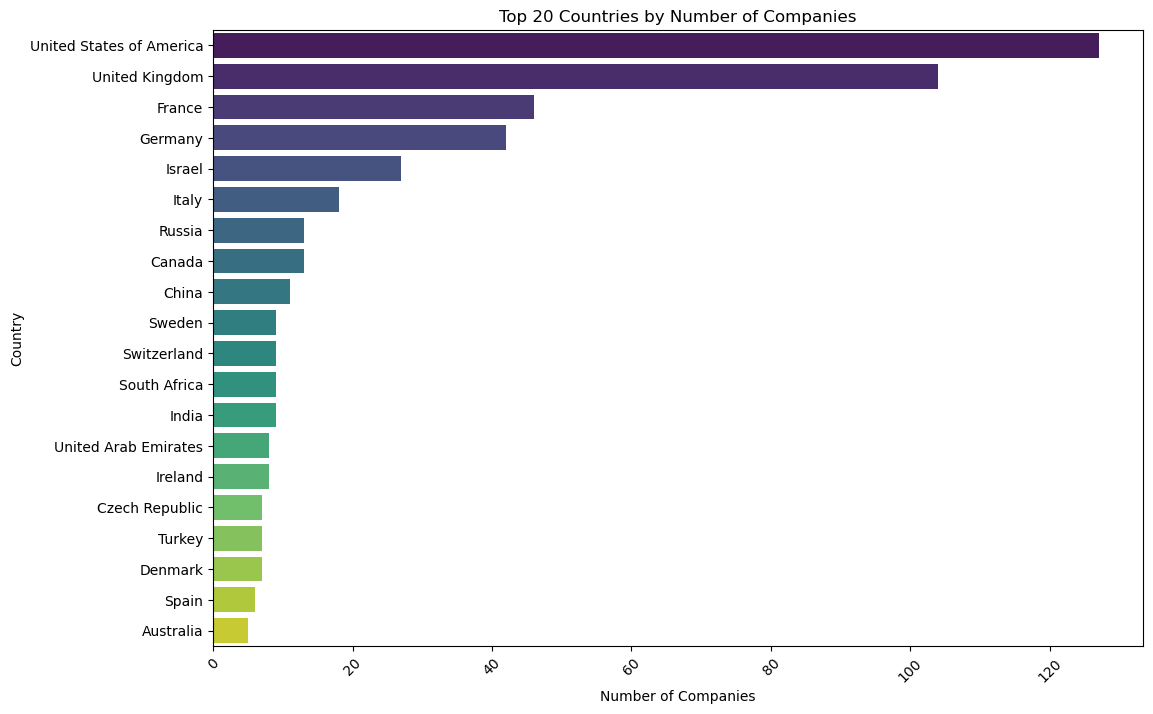

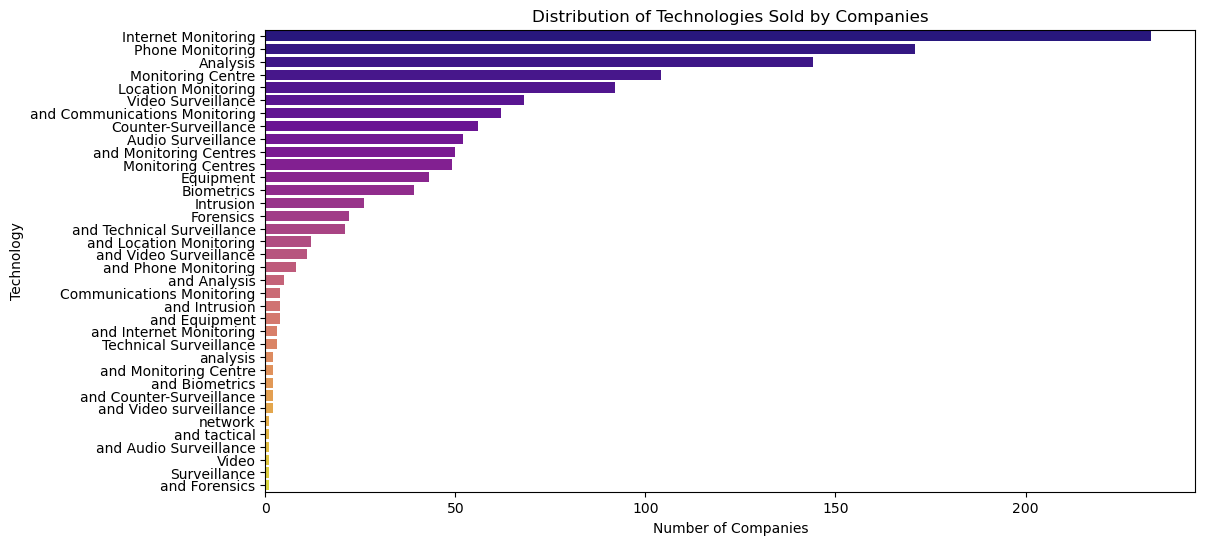

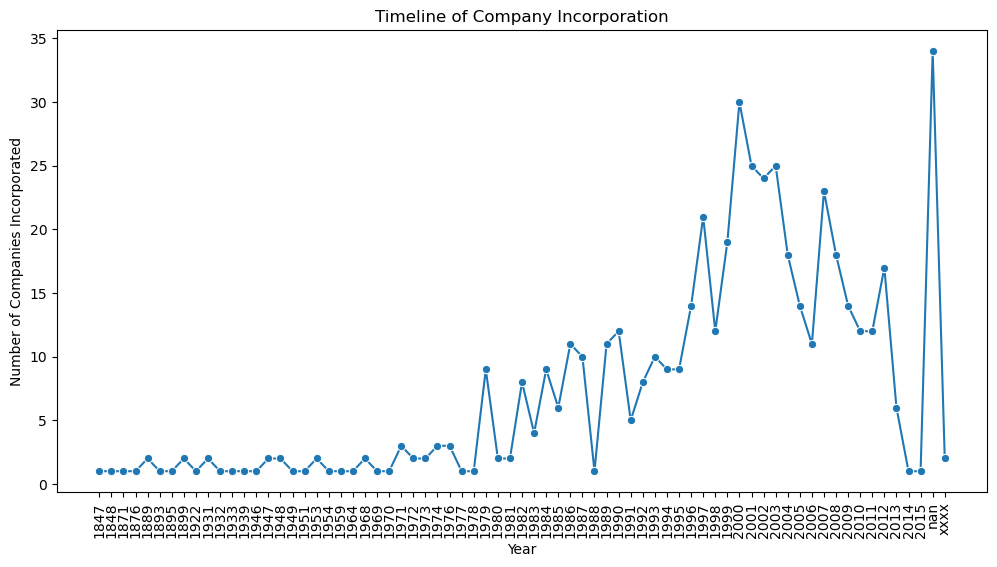

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

with open('companies.json') as file:
    data = json.load(file)

df = pd.json_normalize(data)

plt.figure(figsize=(12, 8))
country_counts = Counter([country for sublist in df['offices_in'].dropna() for country in sublist])
country_df = pd.DataFrame.from_dict(country_counts, orient='index').reset_index()
country_df.columns = ['Country', 'Count']
country_df = country_df.sort_values(by='Count', ascending=False).head(20)  # Show top 20 countries

sns.barplot(x='Count', y='Country', data=country_df, palette='viridis')
plt.title('Top 20 Countries by Number of Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
tech_counts = Counter([tech for sublist in df['technology_sold'].dropna() for tech in sublist])
tech_df = pd.DataFrame.from_dict(tech_counts, orient='index').reset_index()
tech_df.columns = ['Technology', 'Count']
tech_df = tech_df.sort_values(by='Count', ascending=False)

sns.barplot(x='Count', y='Technology', data=tech_df, palette='plasma')
plt.title('Distribution of Technologies Sold by Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Technology')
plt.show()

df['incorporation_date'] = df['incorporation_date'].astype(str)
incorp_counts = df['incorporation_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=incorp_counts.index, y=incorp_counts.values, marker='o')
plt.title('Timeline of Company Incorporation')
plt.xlabel('Year')
plt.ylabel('Number of Companies Incorporated')
plt.xticks(rotation=90)
plt.show()


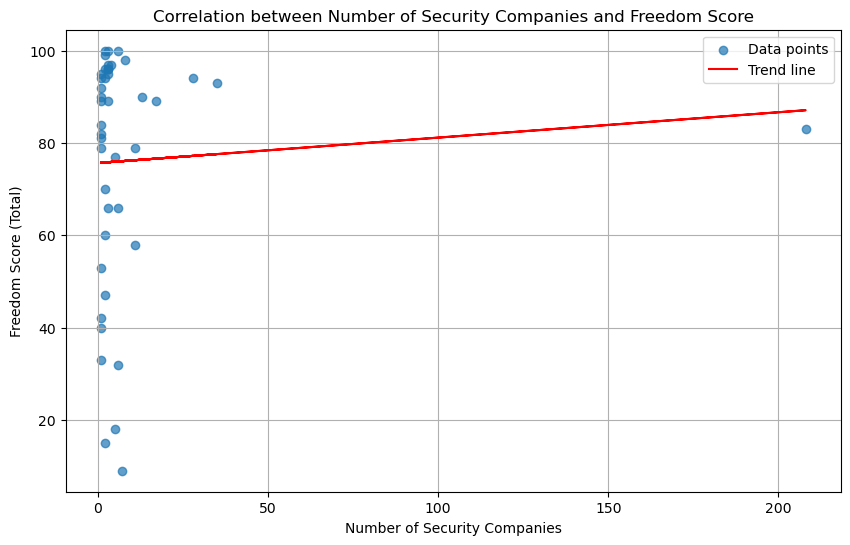

In [4]:
# Load data
hq_counts = pd.read_json('hq_counts.json')
freedom = pd.read_csv('freedom_in_world.csv')

# Standardize country column names
hq_counts.rename(columns={'country': 'Country/Territory'}, inplace=True)

# Merge datasets on the country column
merged_data = pd.merge(hq_counts, freedom, on='Country/Territory')

# Extract the relevant columns
x = merged_data['hq_count']
y = merged_data['Total']

# Calculate the best-fit line
slope, intercept = np.polyfit(x, y, 1)
trendline = slope * x + intercept

# Plotting the scatter plot with the trend line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label='Data points')
plt.plot(x, trendline, color='red', label='Trend line')
plt.title('Correlation between Number of Security Companies and Freedom Score')
plt.xlabel('Number of Security Companies')
plt.ylabel('Freedom Score (Total)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


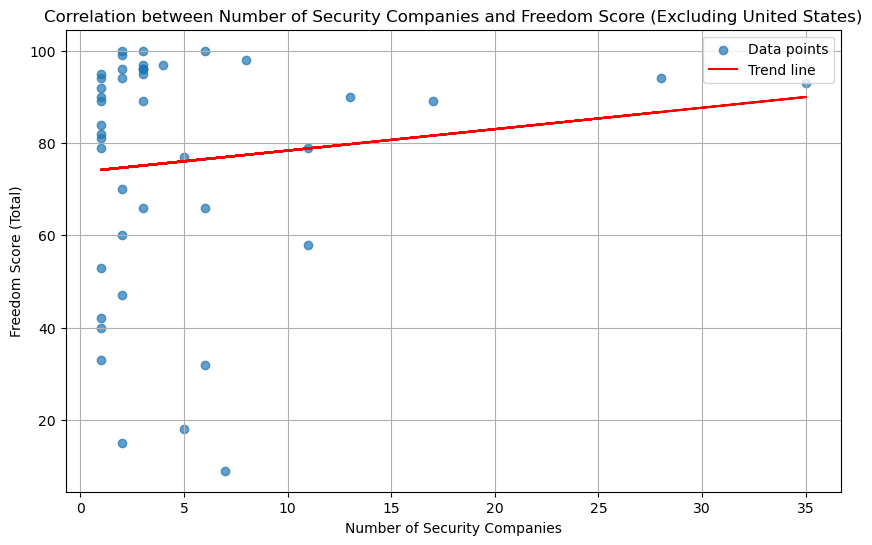

In [5]:

# Remove the United States from the data
merged_data = merged_data[merged_data['Country/Territory'] != 'United States']

# Extract the relevant columns
x = merged_data['hq_count']
y = merged_data['Total']

# Calculate the best-fit line
slope, intercept = np.polyfit(x, y, 1)
trendline = slope * x + intercept

# Plotting the scatter plot with the trend line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, label='Data points')
plt.plot(x, trendline, color='red', label='Trend line')
plt.title('Correlation between Number of Security Companies and Freedom Score (Excluding United States)')
plt.xlabel('Number of Security Companies')
plt.ylabel('Freedom Score (Total)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
